In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score, f1_score, r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [2]:
yt = pd.read_csv('Global YouTube Statistics.csv', encoding = 'windows-1251')
yt.head(3)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [3]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
yt.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [5]:
yt.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

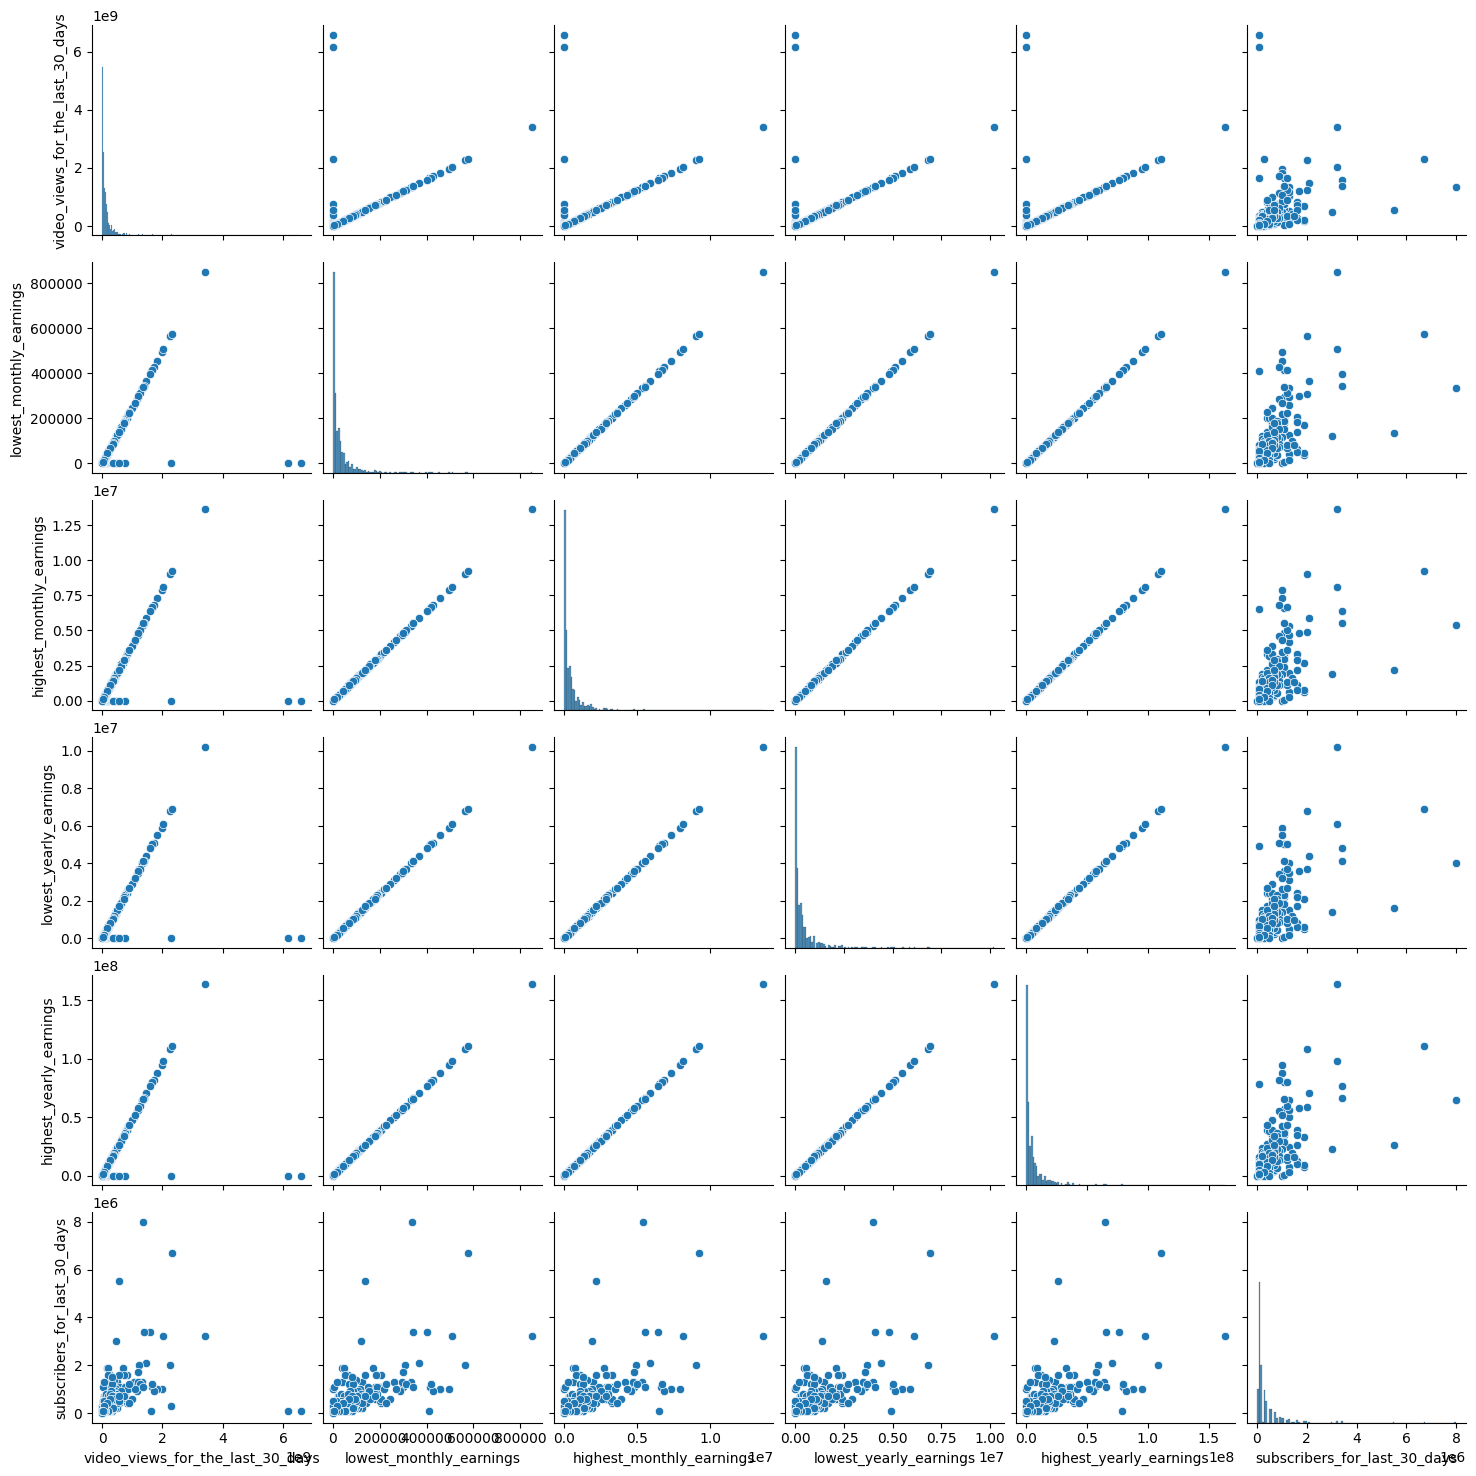

In [6]:
yt_1 = yt.iloc[0:, 13:19]
sns.pairplot(yt_1, )

In [7]:
yt['created_month'].unique()

array(['Mar', 'Feb', 'Sep', 'May', 'Apr', 'Jan', 'Dec', 'Jun', 'Aug',
       'Jul', 'Oct', 'Nov', nan], dtype=object)

Заработки между собой очень сильную корреляцию имеют, поэтому для модели кластеризации и классификации можно будет брать только один показатель а не все. И что логично заработки коррелируют с просмотрами за последние 30 дней.

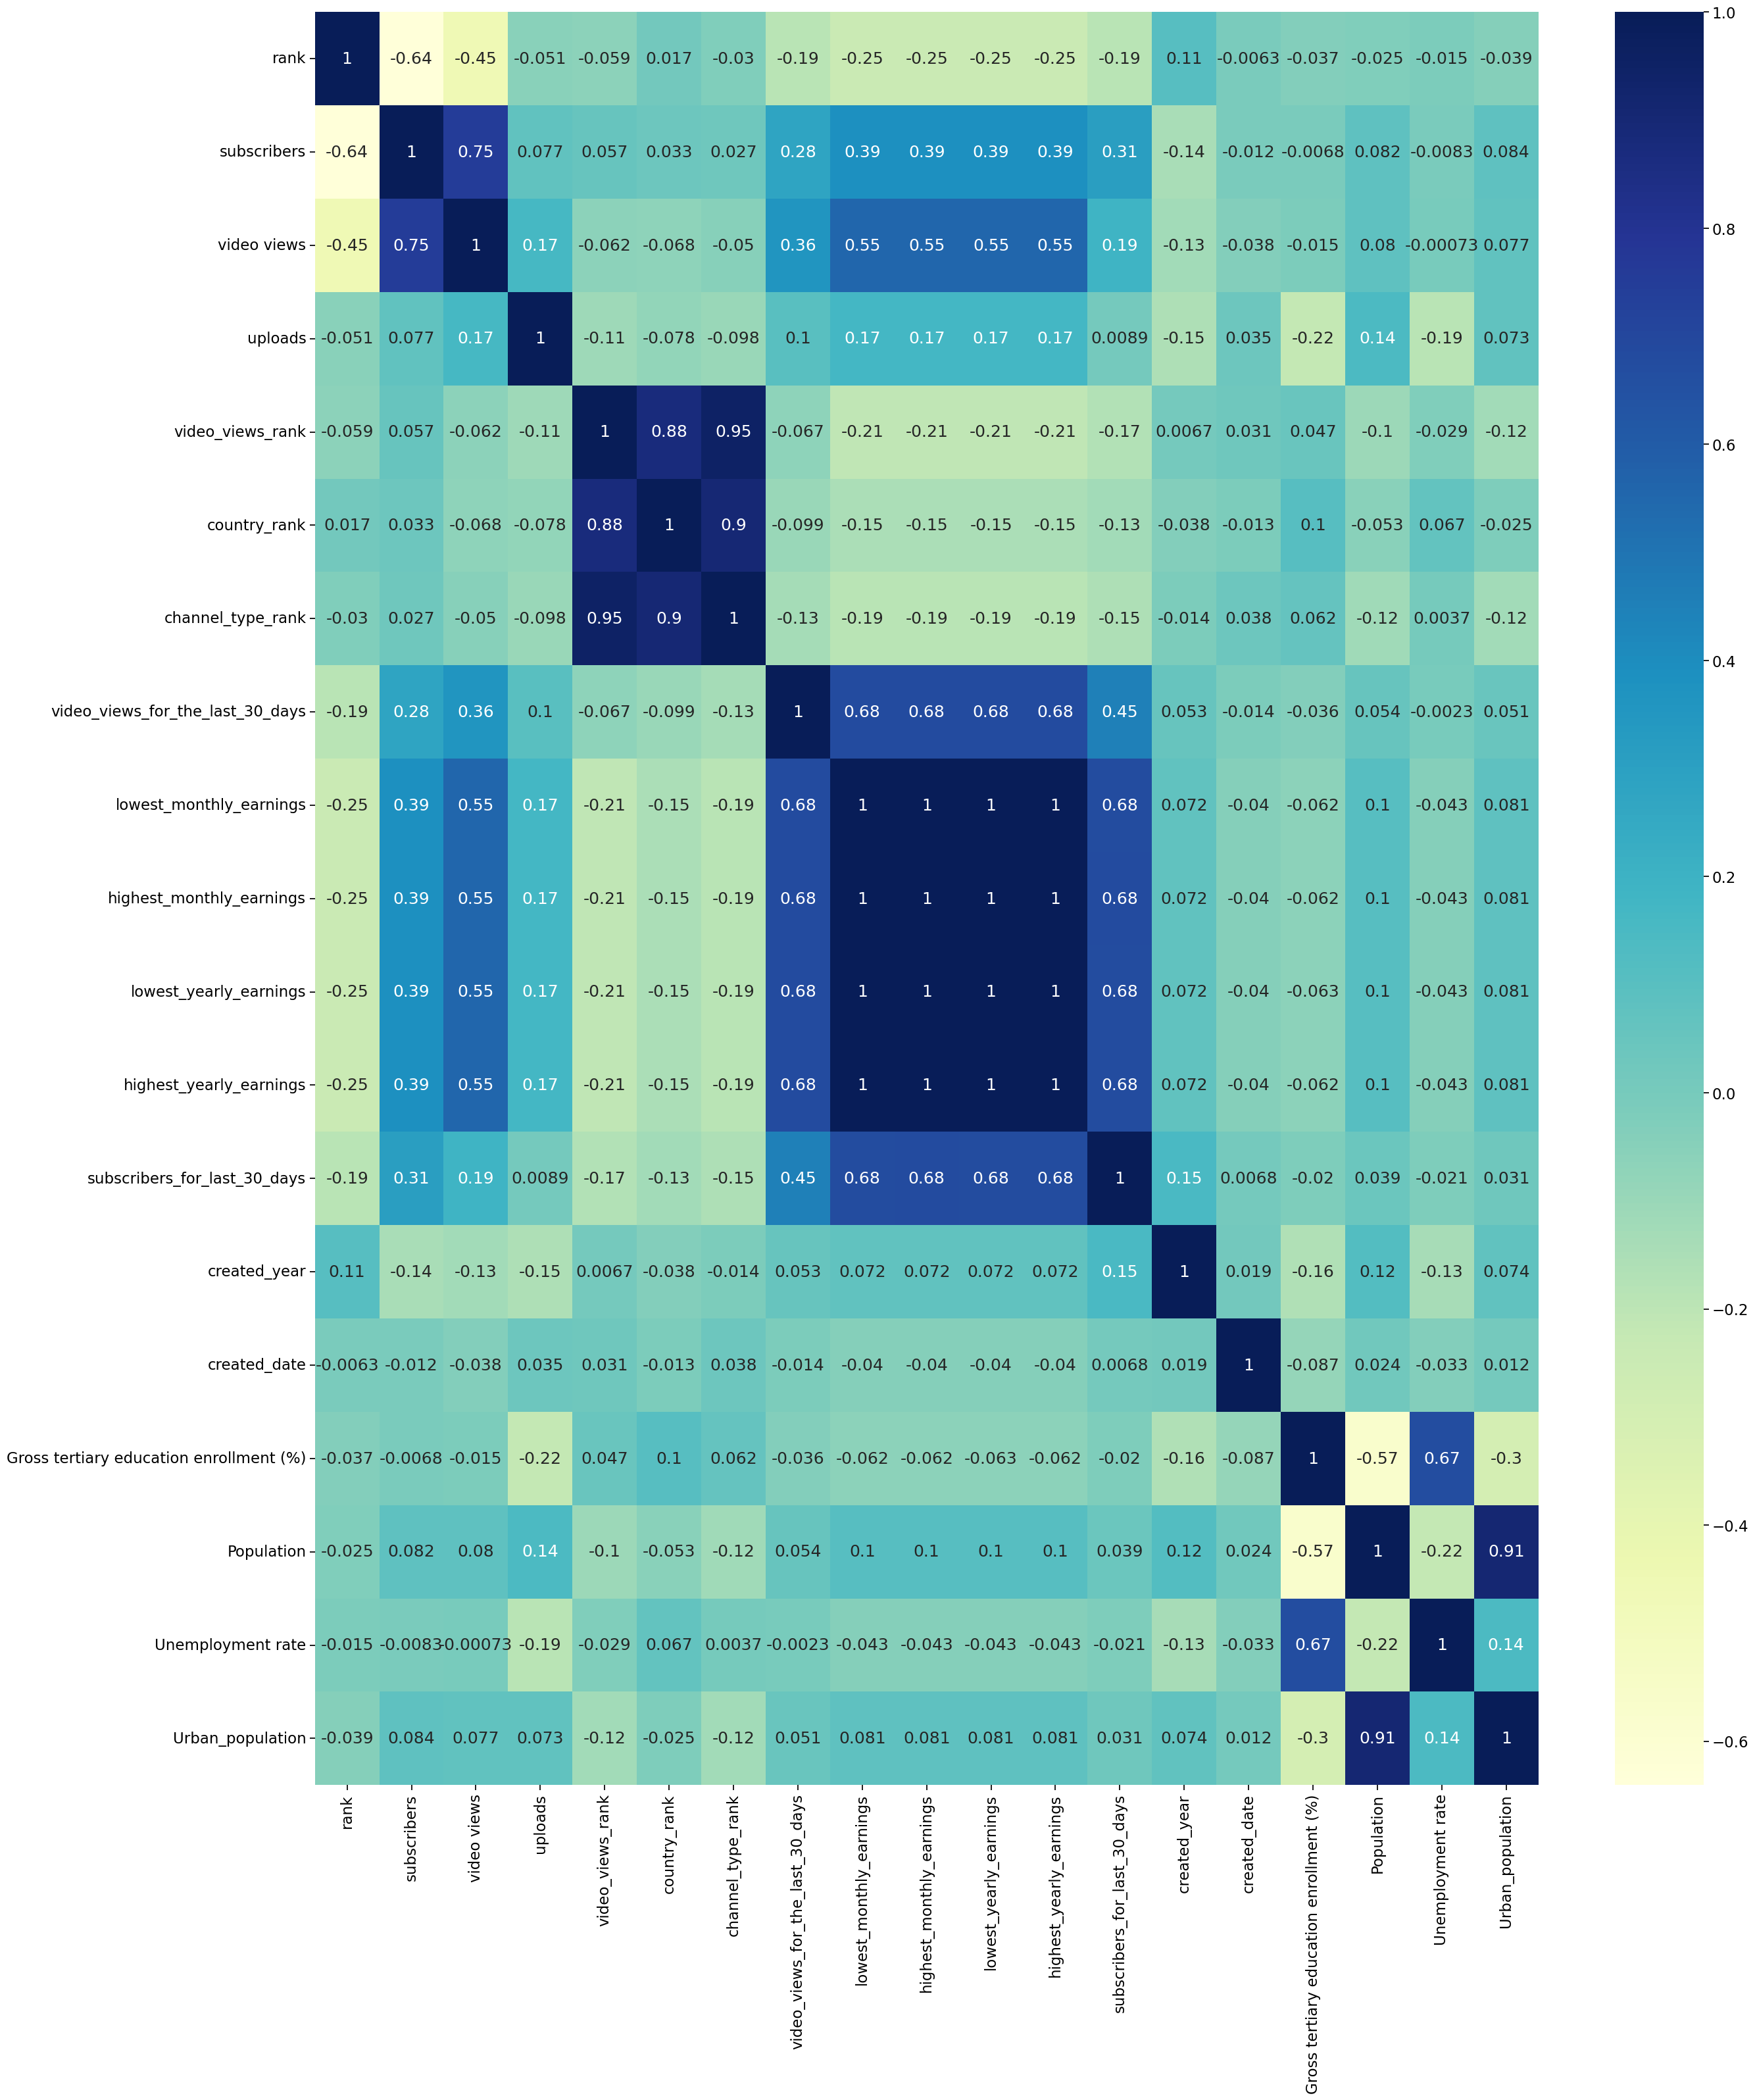

In [8]:
corr_matrix = yt.iloc[0:, :-2].corr(numeric_only=True)
sns.set_context("notebook", font_scale=1.5, rc={"figure.figsize": (29, 35)})
fig = plt.gcf()
fig.set_size_inches(30,35)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [9]:
# Какой тип канала имеет больше всего подписчиков? (топ 3)
yt.groupby('channel_type', as_index=False).agg({'subscribers': 'sum'}).sort_values('subscribers', ascending=False).iloc[:3, :]

,channel_type,subscribers
4,Entertainment,6922500000
8,Music,5771500000
6,Games,2111600000


In [10]:
# На какой тип канала загружается больше всего видео? (топ 3)
yt.groupby('channel_type', as_index=False).agg({'uploads': 'sum'}).sort_values('uploads', ascending=False).iloc[:3, :]

,channel_type,uploads
9,News,3989151
4,Entertainment,3345035
8,Music,424950


In [11]:
# На каком типе канала больше всего просмотров? (топ 3)
yt.groupby('channel_type', as_index=False).agg({'video views': 'sum'}).sort_values('video views', ascending=False).iloc[:3, :]

,channel_type,video views
4,Entertainment,3.371893e+12
8,Music,3.252736e+12
11,People,8.859191e+11


In [12]:
# В какой категории больше всего подписчиков? (топ 3)
yt.groupby('category', as_index=False).agg({'subscribers': 'sum'}).sort_values('subscribers', ascending=False).iloc[:3, :]

,category,subscribers
8,Music,5195000000
3,Entertainment,5158200000
11,People & Blogs,2779400000


In [13]:
# В какой категории больше всего загрузок? (топ 3)
yt.groupby('category', as_index=False).agg({'uploads': 'sum'}).sort_values('uploads', ascending=False).iloc[:3, :]

,category,uploads
9,News & Politics,2924594
3,Entertainment,2869944
11,People & Blogs,1213183


In [14]:
# В какой категории больше всего загрузок? (топ 3)
yt.groupby('category', as_index=False).agg({'video views': 'sum'}).sort_values('video views', ascending=False).iloc[:3, :]

,category,video views
8,Music,3.121478e+12
3,Entertainment,2.527739e+12
11,People & Blogs,1.265791e+12


In [15]:
# В какой стране больше всего подписчиков? Неужели USA. Так удивительно))) (топ 3)
yt.groupby('Country', as_index=False).agg({'subscribers': 'sum'}).sort_values('subscribers', ascending=False).iloc[:3, :]

,Country,subscribers
46,United States,7329500000
18,India,4310600000
6,Brazil,1221800000


In [16]:
# В какой стране больше всего загружается видео? Неужели USA. Так удивительно))) (топ 3)
yt.groupby('Country', as_index=False).agg({'uploads': 'sum'}).sort_values('uploads', ascending=False).iloc[:3, :]
# А вот загружается видео оказывается больше всего в Индии, и что удивительно на 3 месте Таиланд - вот это интересно.

,Country,uploads
18,India,3728212
46,United States,1299609
41,Thailand,858953


Чем больше население страны и городское население, тем меньше процент людей, которые имеют высшее образование. Если задуматься то логично.....

Очень интересная взаимосвязь, чем выше уровень безработицы, тем больше % людей, получивших высшее образование....... 
Или наоборот можно переформиулировать чем выше % людей, получивших высшее образование, тем выше уровень безработицы

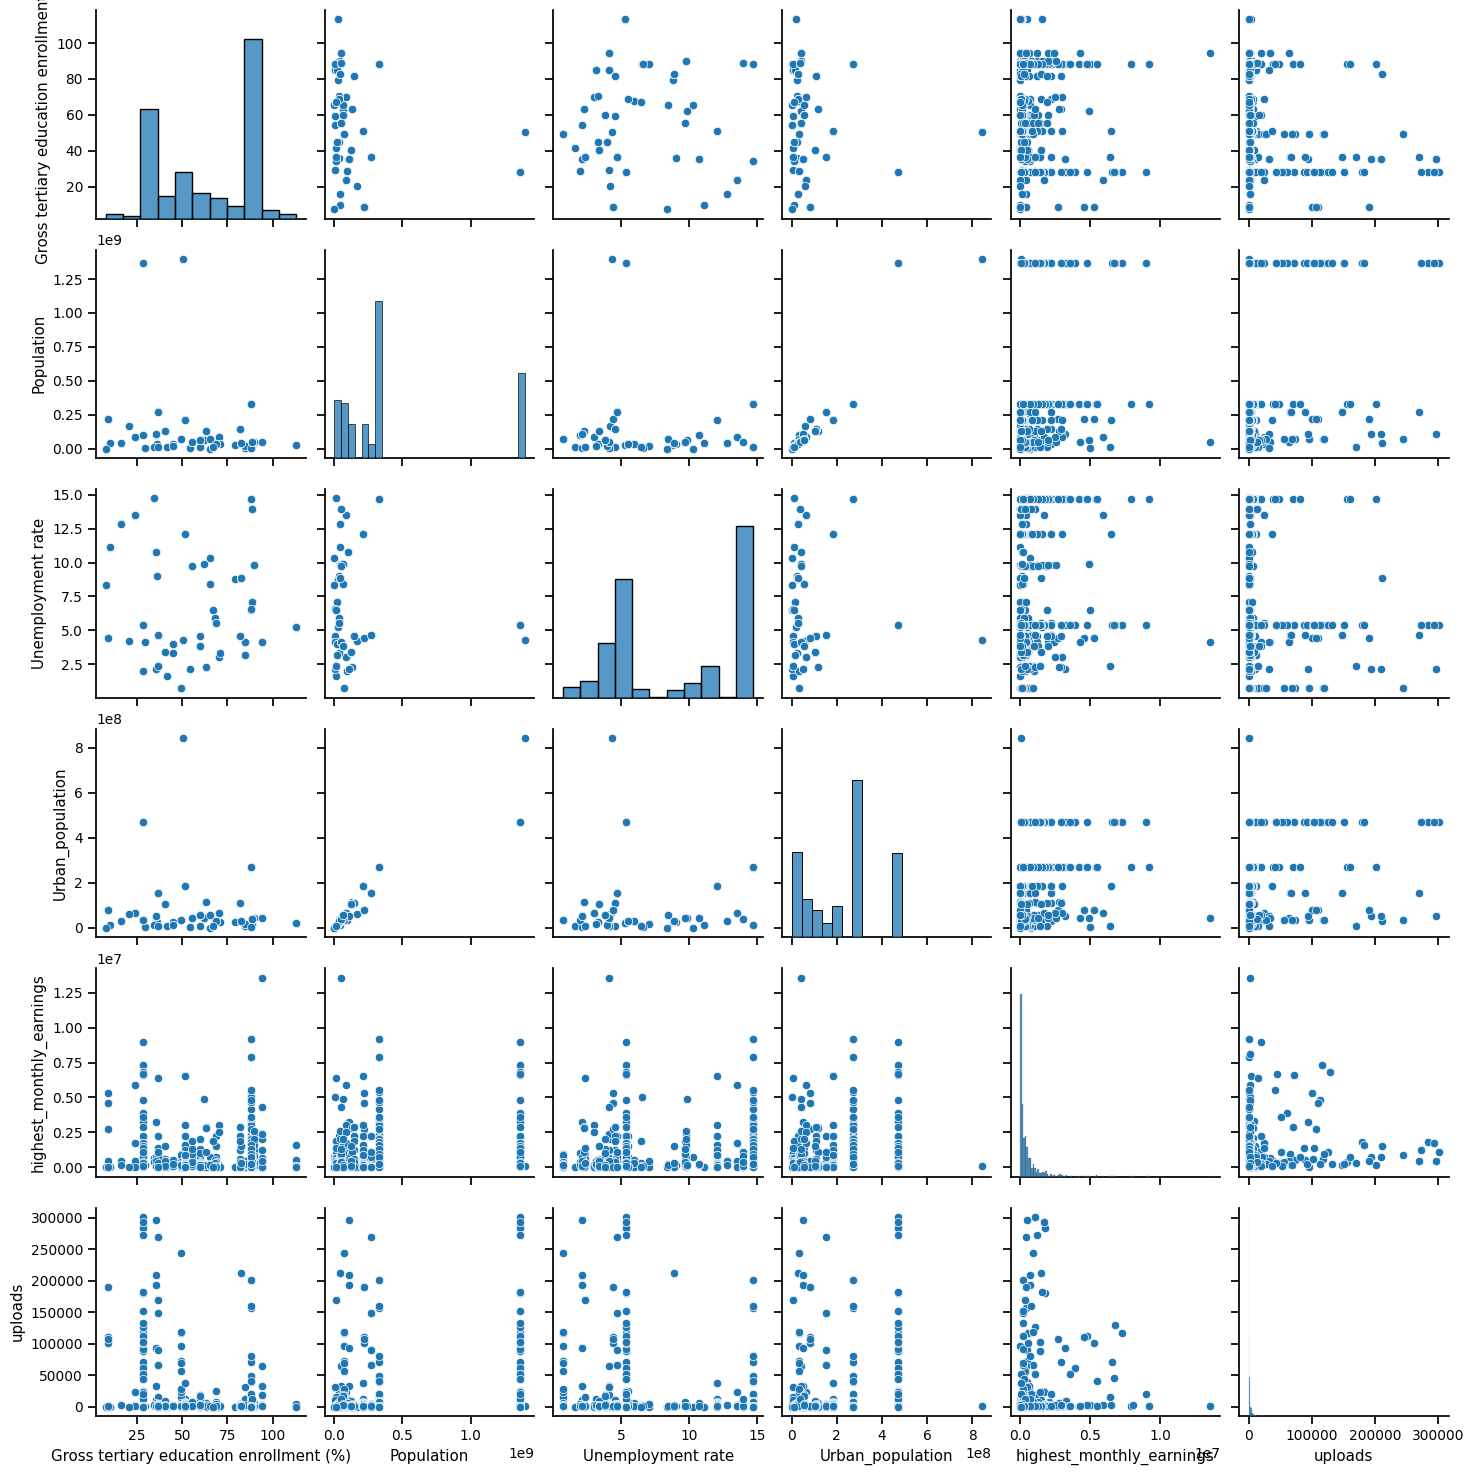

In [17]:
sns.set_context("notebook", font_scale=0.9, rc={"figure.figsize": (29, 35)})
sns.pairplot(yt[['Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'highest_monthly_earnings', 'uploads']])

### Задание 2. Корреляционный анализ

Оставьте два коррелирующих столбца: "subscribers" и"video views".

Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.

Рассчитайте коэффициент корреляции Пирсона.

Определите "video views" как признак Х, а "subscribers" - как целевую переменную.

Разделите выборку на тестовую и тренировочную.

Постройте модель линейной регрессии.

Рассчитайте точность модели на тестовой выборке.

Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

In [18]:
yt_corr = yt[['subscribers', 'video views']]
correlation = yt_corr['subscribers'].corr(yt_corr['video views'])
print(round(correlation, 3))

0.751


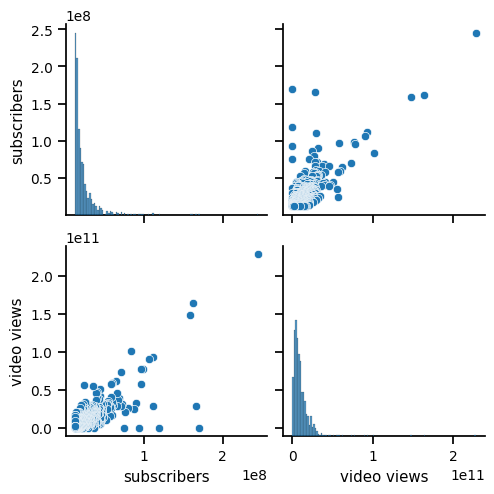

In [19]:
sns.pairplot(yt_corr)

In [20]:
yt_corr_positiv = yt_corr[(yt_corr['video views']>0)]
correlation1 = yt_corr_positiv['subscribers'].corr(yt_corr_positiv['video views'])
print(round(correlation1, 3))

0.824


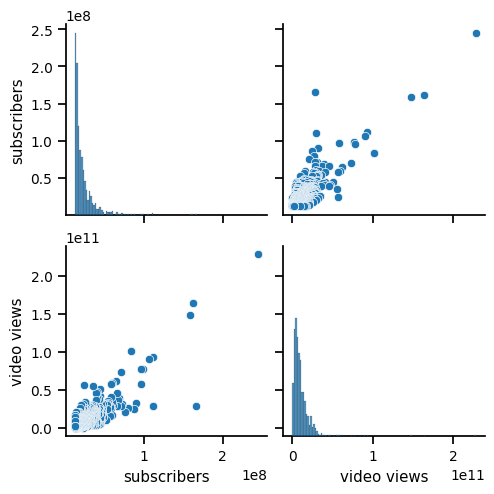

In [21]:
sns.pairplot(yt_corr_positiv)

При исключении нулевых значений коэффициент корреляции становится больше, что впрочем довольно логично....

In [22]:
X = yt_corr_positiv[['video views']]
y = yt_corr_positiv[['subscribers']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
print(f'Точность модели {round(model.score(X_test, y_test), 3) *100}%')

Точность модели 66.3%


Text(0.5, 1.0, 'Predict_model')

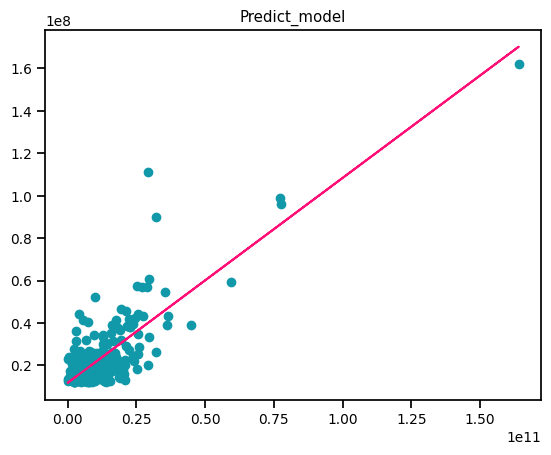

In [27]:
plt.scatter(X_test, y_test, c='#1199AA')
plt.plot(X_test, y_pred, c='#FF1177')
plt.title('Predict_model')

In [28]:
X = yt_corr[['video views']]
y = yt_corr[['subscribers']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Точность модели при учете нулевых значений снизилась и составила: {round(model.score(X_test, y_test), 3) *100}% ')

Точность модели при учете нулевых значений снизилась и составила: 34.0% 


### Задание 3. Классификация

Определите две самые популярные категории канала и отфильтруйте по ним набор данных.

В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]

Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.

Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.

Разделите выборку на тестовую и тренировочную, укажите random_state=13.`

Постройте модель логистической регрессии.

Рассчитайте точность модели на тестовой выборке.

Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

In [29]:
# 2 самые популярные категории
yt.groupby('category', as_index=False).agg({'rank': 'count'}).sort_values('rank', ascending=False)[:2]['category']

3    Entertainment
8            Music
Name: category, dtype: object

In [30]:
yt_popul = yt.query("category in ['Entertainment', 'Music']")

In [31]:
data = yt_popul[['video views', 'subscribers', 'uploads']]

In [32]:
le = LabelEncoder()
le.fit(yt_popul['category'])
data_class = le.transform(yt_popul['category'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.3, random_state=13)

In [34]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
lda.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0])

In [36]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [37]:
result

,0,1
0,1,1
1,1,0
2,1,1
3,1,0
4,1,0
...,...,...
128,0,1
129,1,0
130,0,0
131,1,0


In [38]:
accuracy_score(y_test, lda.predict(X_test))

0.6691729323308271

In [39]:
precision_score(y_test, lda.predict(X_test))

0.7111111111111111

То есть из 100 предсказанных категорий "Музыка" - 71 будет реально "Музыкой", а остальные будут относится к категории "Развлечение"

In [40]:
recall_score(y_test, lda.predict(X_test))

0.5079365079365079

А вот из всех категорий "Музыка" в данных, только 51% будет предсказан моделью как "Музыка", остальные будут отнесены к "Развлечение"

In [41]:
f1_score(y_test, lda.predict(X_test))

0.5925925925925926

Сбалансированный показатель определяющий точность предсказательной модели равен 59% - это по сути и есть точность нашей модели, так как "Развлечение" и "Музыка" - это 2 категории, не являющиеся одна отрицанием другой, то есть нам для того, чтобы понять насколько успешной оказалась наша модель нельзя в данном случае опираться в большей степени на precision или recall, нам необходимо оценить работу модели в целом.

In [85]:
yt_popul_clean = yt_popul[['category', 'Gross tertiary education enrollment (%)', 'channel_type_rank', 'highest_monthly_earnings']].dropna()

In [86]:
yt_popul_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 989
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   category                                 391 non-null    object 
 1   Gross tertiary education enrollment (%)  391 non-null    float64
 2   channel_type_rank                        391 non-null    float64
 3   highest_monthly_earnings                 391 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.3+ KB


In [87]:
data = yt_popul_clean[['Gross tertiary education enrollment (%)', 'channel_type_rank', 'highest_monthly_earnings']]
le = LabelEncoder()
le.fit(yt_popul_clean['category'])
data_class = le.transform(yt_popul_clean['category'])
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.3, random_state=13)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [88]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
print(accuracy_score(y_test, lda.predict(X_test)))
print(precision_score(y_test, lda.predict(X_test)))
print(recall_score(y_test, lda.predict(X_test)))
print(f1_score(y_test, lda.predict(X_test)))

0.5254237288135594
0.5714285714285714
0.13793103448275862
0.2222222222222222


Ну так себе моделька конечно, особенно если рассматривать recall или обобщающий показатель точности f1. А вот precision ну терпимо, то есть из всех показателей Музыка, 57% будут предсказаны правильно